/home/nupur/.local/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/nupur/.local/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/nupur/.local/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/nupur/.local/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


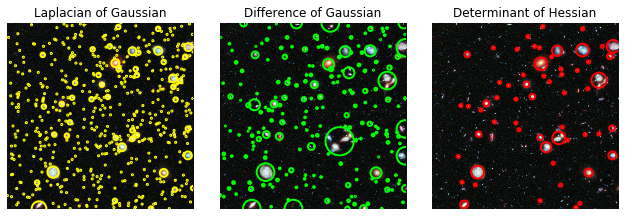

In [3]:
#Source : https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html
'''Blob Detection

Blobs are bright on dark or dark on bright regions in an image. 
In this module, blobs are detected using 3 algorithms.
The image used in this case is the Hubble eXtreme Deep Field.
Each bright dot in the image is a star or a galaxy.

Laplacian of Gaussian (LoG)
This is the most accurate and slowest approach.
It computes the Laplacian of Gaussian images with successively increasing standard deviation
and stacks them up in a cube.
Blobs are local maximas in this cube.
Detecting larger blobs is especially slower because of larger kernel sizes during convolution.
Only bright blobs on dark backgrounds are detected.

Difference of Gaussian (DoG)
This is a faster approximation of LoG approach.
In this case the image is blurred with increasing standard deviations and the difference between
two successively blurred images are stacked up in a cube.
This method suffers from the same disadvantage as LoG approach for detecting larger blobs.
Blobs are again assumed to be bright on dark.

Determinant of Hessian (DoH)
This is the fastest approach. 
It detects blobs by finding maximas in the matrix of the Determinant of Hessian of the image.
The detection speed is independent of the size of blobs as internally the implementation uses box filters
instead of convolutions. 
Bright on dark as well as dark on bright blobs are detected.
The downside is that small blobs (<3px) are not detected accurately.'''


from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()